In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense, BatchNormalization, Dropout, Flatten 
from keras.optimizers import Adam 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import pickle 
import cv2 
import os 
import pandas as pd 
import random 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from scipy import misc , ndimage
from tensorflow import keras
import tensorflow as tf 

In [10]:
imageDimensions = (64, 64)  # 64x64 boyutunda
path = "/Users/suedabeyzaozcan/Desktop/fabricerror"
#labelFile = "/Users/suedabeyzaozcan/Desktop/fabric_labels.csv"

categories = ['good', 'hole', 'objects', 'oilspot', 'threaderror']
data = []
for category in categories:
    folder_path = os.path.join(path, category)
    label = categories.index(category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, imageDimensions)
        img = img.astype('float32') / 255.0
        data.append((img, label))
random.shuffle(data)
images, labels = zip(*data)
images = np.array(images)
labels = np.array(labels)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
def myModel(noOfClasses):
    no_Of_Filters = 64 
    size_of_Filter = (5,5)
    size_of_Filter2 = (3,3)
    size_of_pool = (2,2)
    no_Of_Nodes = 500
    
    model = Sequential()
    model.add(Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimensions[0], imageDimensions[1], 1), activation="relu"))
    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation="relu"))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation="relu"))
    model.add(Dense(noOfClasses, activation="softmax"))
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

noOfClasses = 5  # yada kaç sınıfsa
model = myModel(noOfClasses)
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 58, 58, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │    13,456,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,479,261 (51.42 MB)

 Trainable params: 13,479,197 (51.42 MB)

 Non-trainable params: 64 (256.00 B)

None


In [13]:
history = model.fit(X_train.reshape(-1, 64, 64, 1), y_train,  # 4D tensör formatı
                    batch_size=64,
                    epochs=20,
                    validation_data=(X_validation.reshape(-1, 64, 64, 1), y_validation))

Epoch 1/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 206s 804ms/step - accuracy: 0.8213 - loss: 3.0979 - val_accuracy: 0.9141 - val_loss: 0.4078
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 234s 916ms/step - accuracy: 0.8944 - loss: 0.5323 - val_accuracy: 0.9141 - val_loss: 0.4287
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 201s 786ms/step - accuracy: 0.9027 - loss: 0.4639 - val_accuracy: 0.9019 - val_loss: 0.7518
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 200s 782ms/step - accuracy: 0.9014 - loss: 0.4771 - val_accuracy: 0.0354 - val_loss: 32.4178
Epoch 5/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 188s 735ms/step - accuracy: 0.9046 - loss: 0.4555 - val_accuracy: 0.3533 - val_loss: 1.7059
Epoch 6/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 200s 781ms/step - accuracy: 0.9005 - loss: 0.5025 - val_accuracy: 0.8423 - val_loss: 1.3016
Epoch 7/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 196s 764ms/step - accuracy: 0.9103 - loss: 0.3850 - val_accuracy: 0.4485 - val_loss: 1.2339
Epoch 8/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 183s 715ms/step - accuracy: 0.9213 

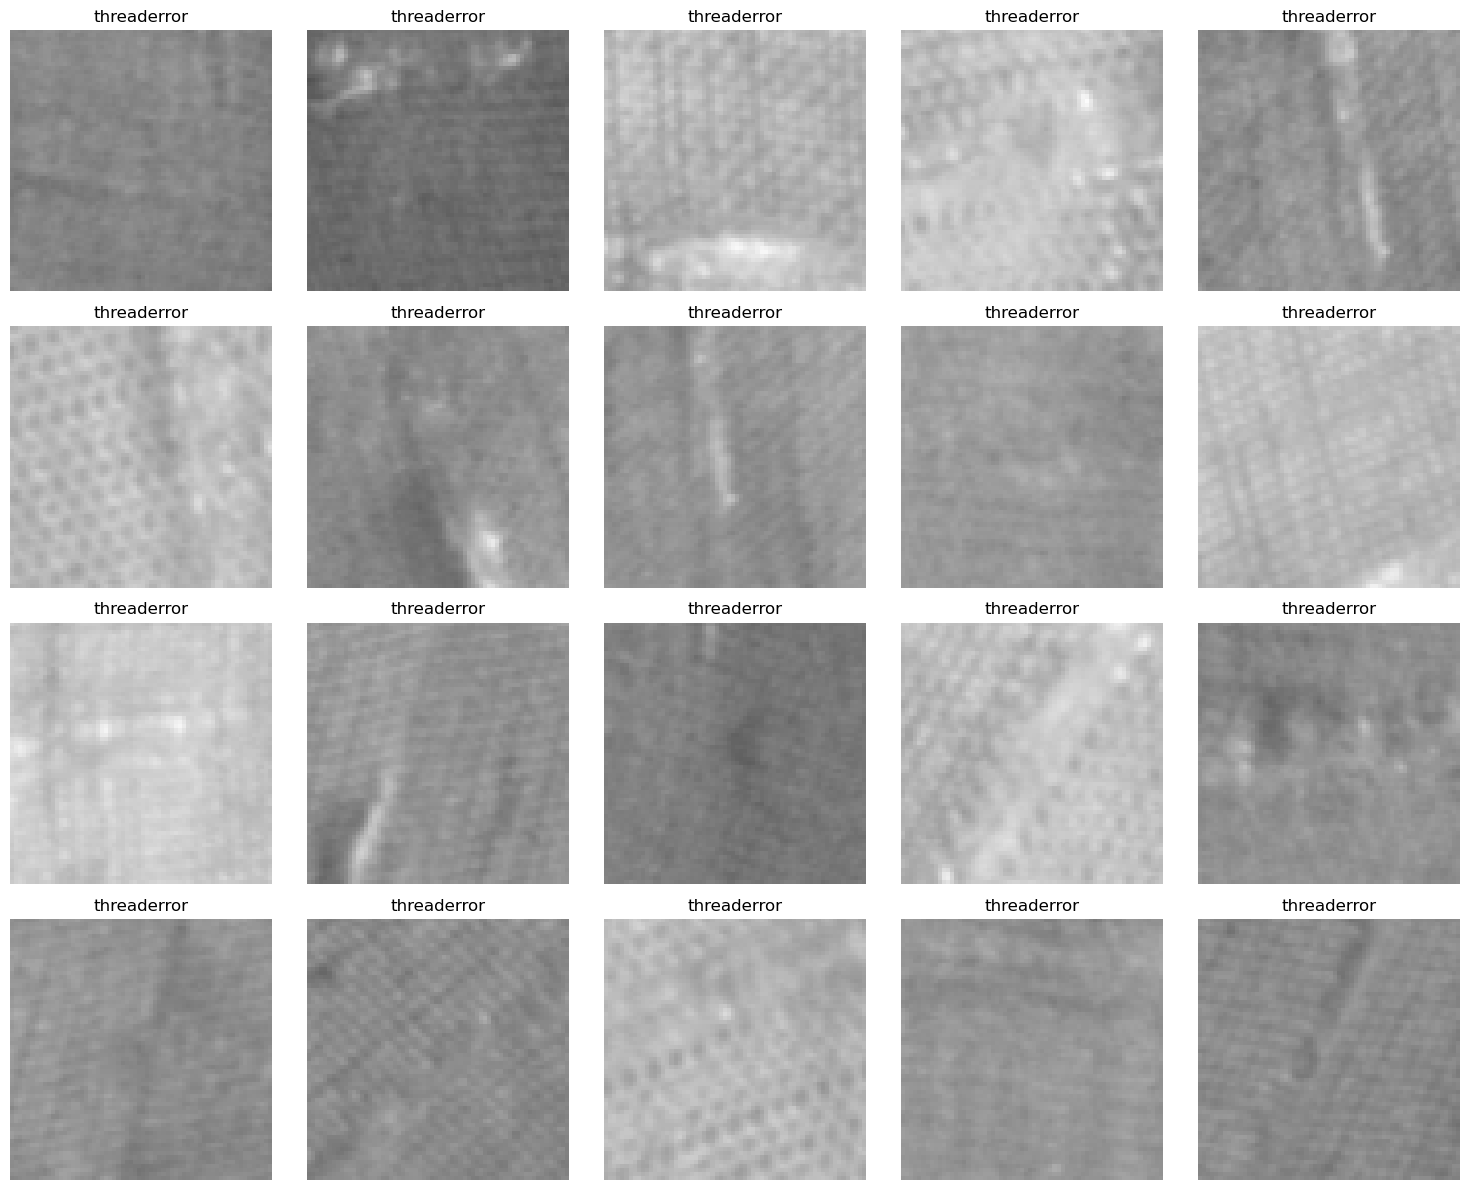

Image 1: Category - threaderror
Image 2: Category - threaderror
Image 3: Category - threaderror
Image 4: Category - threaderror
Image 5: Category - threaderror
Image 6: Category - threaderror
Image 7: Category - threaderror
Image 8: Category - threaderror
Image 9: Category - threaderror
Image 10: Category - threaderror
Image 11: Category - threaderror
Image 12: Category - threaderror
Image 13: Category - threaderror
Image 14: Category - threaderror
Image 15: Category - threaderror
Image 16: Category - threaderror
Image 17: Category - threaderror
Image 18: Category - threaderror
Image 19: Category - threaderror
Image 20: Category - threaderror
Image 21: Category - objects
Image 22: Category - objects
Image 23: Category - objects
Image 24: Category - objects
Image 25: Category - objects
Image 26: Category - objects
Image 27: Category - objects
Image 28: Category - objects
Image 29: Category - objects
Image 30: Category - objects
Image 31: Category - objects
Image 32: Category - objects
I

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Verisetinin dosya yolu
data_path = "/Users/suedabeyzaozcan/Desktop/fabricerror"

# Kategorilere ait klasörleri listeleme
categories = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]  

# Rastgele 20 resim seçme
num_samples = 20  # Seçilecek toplam resim sayısı
selected_images = []
selected_labels = []

# Her kategoriden num_samples kadar rastgele resim seçme
for category in categories:
    category_path = os.path.join(data_path, category)
    image_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]  # Yalnızca resim dosyalarını listele
    
    if len(image_files) > 0:
        # Rastgele resimleri seçme
        selected_files = np.random.choice(image_files, size=min(num_samples, len(image_files)), replace=False)
        for file_name in selected_files:
            image_path = os.path.join(category_path, file_name)
            image = plt.imread(image_path)
            selected_images.append(image)
            selected_labels.append(category)

# Görüntüleri ve kategorilerini görselleştirme
fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # 4 satır 5 sütun şeklinde bir grid oluştur
axes = axes.flatten()  # 2D grid'i 1D diziye dönüştür

for img, label, ax in zip(selected_images, selected_labels, axes):
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()  # Alt alta sıralı görüntüleri hizalamak için
plt.show()

# Seçilen görüntüler ve etiketleri yazdırma
for i, (img, label) in enumerate(zip(selected_images, selected_labels)):
    print(f"Image {i+1}: Category - {label}")

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# Autoencoder modelinin tanımlanması
input_img = Input(shape=(64, 64, 1))  # Girdi görüntüsü boyutu: 64x64 ve 1 kanal (gri tonlamalı)

# Encoder kısmı
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Bottleneck kısmı
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Decoder kısmı
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Çıktı katmanı, aynı boyutta gri tonlamalı görüntü

# Autoencoder modelinin tanımlanması
autoencoder = Model(input_img, decoded)

# Modeli derleme
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Model özetini görüntüleme
autoencoder.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,369 (52.22 KB)

 Trainable params: 13,369 (52.22 KB)

 Non-trainable params: 0 (0.00 B)

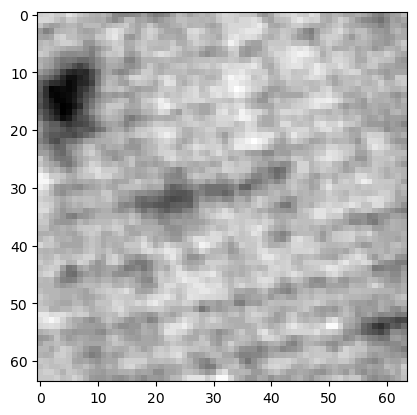

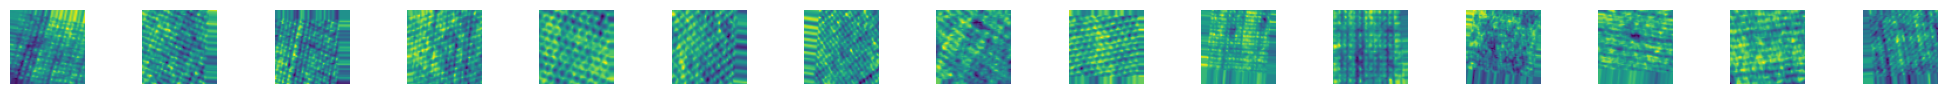

In [30]:
# Örnek bir görüntü gösterimi
rand_num = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[rand_num].reshape(64, 64), cmap='gray')
plt.show()
dataGen = ImageDataGenerator(width_shift_range=0.1, 
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
dataGen.fit(X_train.reshape(-1, 64, 64, 1))  # 4D tensör formatı
batches = dataGen.flow(X_train.reshape(-1, 64, 64, 1), y_train, batch_size=20)
X_batch, y_batch = next(batches)

# eğitim veri artırma örneklerini görselleştirme
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(64, 64))
    axs[i].axis('off')
plt.show()


In [25]:
# 'good' örnekleri kullanarak model eğitimi
good_images = [cv2.resize(cv2.imread(os.path.join(path, 'good', img)), imageDimensions) for img in os.listdir(os.path.join(path, 'good'))]
good_images = np.array(good_images)
good_images = good_images.astype('float32') / 255.0  # Normalize et

X_train_good, X_test_good = train_test_split(good_images, test_size=0.2, random_state=42)


In [27]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from tensorflow.keras.models import Model

input_img = Input(shape=(imageDimensions[0], imageDimensions[1], 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(imageDimensions[0] * imageDimensions[1] * 3, activation='sigmoid')(x)
x = Reshape((imageDimensions[0], imageDimensions[1], 3))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

def create_autoencoder_model():
    input_img = Input(shape=(imageDimensions[0], imageDimensions[1], 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

autoencoder = create_autoencoder_model()


In [33]:
autoencoder.fit(X_train_good, X_train_good, epochs=20, batch_size=64, validation_data=(X_test_good, X_test_good))

Epoch 1/20
249/290 ━━━━━━━━━━━━━━━━━━━━ 23s 577ms/step - loss: 0.6172

KeyboardInterrupt: 

In [31]:
# Hatalı kumaşların tahminini ve katagorilere ayırma
bad_images = []
for category in  ['good', 'hole', 'objects', 'oilspot', 'threaderror']:
    for img_name in os.listdir(os.path.join(path, category)):
        img_path = os.path.join(path, category, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, imageDimensions)
        bad_images.append(img)
bad_images = np.array(bad_images)
bad_images = bad_images.astype('float32') / 255.0

# Anormallik testi 
reconstructed_images = autoencoder.predict(bad_images)
reconstruction_loss = np.mean(np.abs(bad_images - reconstructed_images), axis=(1, 2, 3))
threshold = np.percentile(reconstruction_loss, 95)  # %95 kesme noktası

for i, loss in enumerate(reconstruction_loss):
    if loss > threshold:
        print(f'Image {i} is considered an anomaly.')
    else:
        print(f'Image {i} is considered normal.')

800/800 ━━━━━━━━━━━━━━━━━━━━ 56s 70ms/step
Image 0 is considered normal.
Image 1 is considered normal.
Image 2 is considered normal.
Image 3 is considered normal.
Image 4 is considered an anomaly.
Image 5 is considered normal.
Image 6 is considered normal.
Image 7 is considered normal.
Image 8 is considered normal.
Image 9 is considered normal.
Image 10 is considered normal.
Image 11 is considered normal.
Image 12 is considered normal.
Image 13 is considered normal.
Image 14 is considered normal.
Image 15 is considered normal.
Image 16 is considered normal.
Image 17 is considered normal.
Image 18 is considered normal.
Image 19 is considered normal.
Image 20 is considered normal.
Image 21 is considered normal.
Image 22 is considered normal.
Image 23 is considered normal.
Image 24 is considered normal.
Image 25 is considered normal.
Image 26 is considered normal.
Image 27 is considered normal.
Image 28 is considered normal.
Image 29 is considered normal.
Image 30 is considered normal.
Im

In [32]:
import shutil

# Yeni kumaşların test edildiği yer
new_fabric_path = "/Users/suedabeyzaozcan/Desktop/fabricerror/yeni"
others_path = "/Users/suedabeyzaozcan/Desktop/fabricerror/others"

# Tespit edilen anomali indekslerini elde et
anomalies = [i for i, loss in enumerate(reconstruction_loss) if loss > threshold]

# 'good'olmayan kumaşları "others" klasörüne taşır
for i in anomalies:
    src = os.path.join(new_fabric_path, f"new_fabric_{i}.png")  # Yeni kumaşların dosya adları
    dst = os.path.join(others_path, f"new_fabric_{i}.png")
    shutil.move(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/suedabeyzaozcan/Desktop/fabricerror/yeni/new_fabric_4.png'